In [1]:
import cv2
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import sklearn.metrics as metrics
from keras.utils import to_categorical
from keras.models import load_model

Using TensorFlow backend.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [69]:
# Splitting the original "Training" set of the Fruits360 in order to have some images for the Test set.
# Therefore, the original "Test" set of the Fruits360 will become our Validation set.
# import split_folders
# split_folders.ratio('D:/Fruits360/Training', output="output", seed=1337, ratio=(.85, .15))




Copying files: 0 files [00:00, ? files/s]


Copying files: 89 files [00:00, 883.14 files/s]


Copying files: 225 files [00:00, 955.18 files/s]


Copying files: 346 files [00:00, 1012.91 files/s]


Copying files: 457 files [00:00, 1038.73 files/s]


Copying files: 555 files [00:00, 1017.93 files/s]


Copying files: 673 files [00:00, 1059.70 files/s]


Copying files: 807 files [00:00, 1095.90 files/s]


Copying files: 924 files [00:00, 1117.05 files/s]


Copying files: 1032 files [00:00, 1098.21 files/s]


Copying files: 1140 files [00:01, 1075.93 files/s]


Copying files: 1256 files [00:01, 1097.51 files/s]


Copying files: 1375 files [00:01, 1121.44 files/s]


Copying files: 1487 files [00:01, 1082.96 files/s]


Copying files: 1607 files [00:01, 1113.33 files/s]


Copying files: 1723 files [00:01, 1124.54 files/s]


Copying files: 1844 files [00:01, 1146.40 files/s]


Copying files: 1959 files [00:01, 1096.18 files/s]


Copying files: 2093 files [00:01, 1126.78 files/s]


Copying fi

Copying files: 30151 files [00:33, 990.39 files/s]


Copying files: 30271 files [00:33, 1039.29 files/s]


Copying files: 30393 files [00:33, 1045.53 files/s]


Copying files: 30499 files [00:33, 879.11 files/s] 


Copying files: 30615 files [00:33, 940.55 files/s]


Copying files: 30715 files [00:34, 918.41 files/s]


Copying files: 30811 files [00:34, 929.22 files/s]


Copying files: 30907 files [00:34, 824.27 files/s]


Copying files: 31016 files [00:34, 882.44 files/s]


Copying files: 31149 files [00:34, 949.42 files/s]


Copying files: 31249 files [00:34, 881.54 files/s]


Copying files: 31342 files [00:34, 890.64 files/s]


Copying files: 31434 files [00:34, 857.35 files/s]


Copying files: 31522 files [00:35, 821.77 files/s]


Copying files: 31612 files [00:35, 843.63 files/s]


Copying files: 31736 files [00:35, 903.59 files/s]


Copying files: 31856 files [00:35, 972.05 files/s]


Copying files: 31957 files [00:35, 941.49 files/s]


Copying files: 32054 files [00:35, 905.79 f

Copying files: 58540 files [01:03, 1115.94 files/s]


Copying files: 58661 files [01:03, 1140.65 files/s]


Copying files: 58783 files [01:03, 1162.88 files/s]


Copying files: 58910 files [01:03, 1144.67 files/s]


Copying files: 59025 files [01:03, 1087.32 files/s]


Copying files: 59142 files [01:04, 1110.86 files/s]


Copying files: 59254 files [01:04, 1098.29 files/s]


Copying files: 59365 files [01:04, 1036.40 files/s]


Copying files: 59482 files [01:04, 1072.97 files/s]


Copying files: 59591 files [01:04, 1075.67 files/s]


Copying files: 59704 files [01:04, 1090.86 files/s]


Copying files: 59814 files [01:04, 887.02 files/s] 


Copying files: 59925 files [01:04, 942.14 files/s]


Copying files: 60043 files [01:04, 1001.84 files/s]


Copying files: 60160 files [01:05, 1046.42 files/s]


Copying files: 60288 files [01:05, 1082.20 files/s]


Copying files: 60498 files [01:05, 924.91 files/s] 


In [71]:
# This was the initial code to obtain the new dataset in which we have not considered "Multiple Fruits".
# I saved these three sets into a folder called "Fruits-360" and using this new data for modelling.

# datagen = tf.keras.preprocessing.image.ImageDataGenerator()
# train = datagen.flow_from_directory('C:/Users/vidya/Documents/Code/output/train', class_mode='categorical', batch_size=32)
# test = datagen.flow_from_directory('C:/Users/vidya/Documents/Code/output/val', class_mode='categorical', batch_size=32)
# val = datagen.flow_from_directory('D:/Fruits360/Test', class_mode='categorical', batch_size=32)

Found 54194 images belonging to 120 classes.
Found 6093 images belonging to 120 classes.
Found 20622 images belonging to 120 classes.


In [38]:
# Let's understand the number of images we have per class in the train set and the test set.
base_path = "D:/Fruits-360/"
for fruit in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + fruit))) + " " + fruit)

344 Apple Braeburn images
310 Apple Crimson Snow images
418 Apple Golden 1 images
442 Apple Golden 2 images
432 Apple Golden 3 images
442 Apple Granny Smith images
410 Apple Pink Lady images
442 Apple Red 1 images
442 Apple Red 2 images
386 Apple Red 3 images
441 Apple Red Delicious images
442 Apple Red Yellow 1 images
604 Apple Red Yellow 2 images
442 Apricot images
384 Avocado images
441 Avocado ripe images
441 Banana images
405 Banana Lady Finger images
441 Banana Red images
405 Beetroot images
415 Blueberry images
441 Cactus fruit images
442 Cantaloupe 1 images
442 Cantaloupe 2 images
441 Carambula images
631 Cauliflower images
442 Cherry 1 images
664 Cherry 2 images
664 Cherry Rainier images
442 Cherry Wax Black images
442 Cherry Wax Red images
442 Cherry Wax Yellow images
405 Chestnut images
441 Clementine images
441 Cocos images
441 Dates images
421 Eggplant images
89 Ginger Root images
441 Granadilla images
885 Grape Blue images
442 Grape Pink images
441 Grape White images
441 

In [5]:
base_path = "D:/Fruits-360/"
for fruit in os.listdir(base_path + "val"):
    print(str(len(os.listdir(base_path + "val/" + fruit))) + " " + fruit)

164 Apple Braeburn images
148 Apple Crimson Snow images
164 Apple Golden 1 images
164 Apple Golden 2 images
161 Apple Golden 3 images
164 Apple Granny Smith images
152 Apple Pink Lady images
164 Apple Red 1 images
164 Apple Red 2 images
144 Apple Red 3 images
166 Apple Red Delicious images
164 Apple Red Yellow 1 images
219 Apple Red Yellow 2 images
164 Apricot images
143 Avocado images
166 Avocado ripe images
166 Banana images
152 Banana Lady Finger images
166 Banana Red images
150 Beetroot images
154 Blueberry images
166 Cactus fruit images
164 Cantaloupe 1 images
164 Cantaloupe 2 images
166 Carambula images
234 Cauliflower images
164 Cherry 1 images
246 Cherry 2 images
246 Cherry Rainier images
164 Cherry Wax Black images
164 Cherry Wax Red images
164 Cherry Wax Yellow images
153 Chestnut images
166 Clementine images
166 Cocos images
166 Dates images
156 Eggplant images
99 Ginger Root images
166 Granadilla images
328 Grape Blue images
164 Grape Pink images
166 Grape White images
166 

In [11]:
# This determines the shape of the image
image = cv2.imread('D:/Fruits-360/train/Apple Braeburn/106_100.jpg')
print(image.shape)

(100, 100, 3)


In [12]:
X_train = [] 
y_train = [] 
k = 0

base_path = "D:/Fruits-360/"
for fruit in os.listdir(base_path + "train"):
    for img in glob.glob(os.path.join(base_path + "train/" + fruit, "*.jpg")):
        img = cv2.imread(img)
        img = cv2.resize(img, (100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X_train.append(img)
        y_train.append(k)
    k = k + 1   #storing class indices as the labels
        
X_train=np.array(X_train)
y_train=np.array(y_train)
y_train=to_categorical(y_train, num_classes=120)

X_train.shape

(54194, 100, 100, 3)

In [13]:
y_train.shape

(54194, 120)

In [14]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [16]:
X_val = [] 
y_val = []
k = 0

base_path = "D:/Fruits-360/"
for fruit in os.listdir(base_path + "val"):
    for img in glob.glob(os.path.join(base_path + "val/" + fruit, "*.jpg")):
        img = cv2.imread(img)
        img = cv2.resize(img, (100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X_val.append(img)
        y_val.append(k)
    k = k + 1    #storing class indices as the labels
    
X_val=np.array(X_val)
y_val=np.array(y_val)
y_val = to_categorical(y_val, 120)

X_val.shape

(20622, 100, 100, 3)

In [17]:
y_val.shape

(20622, 120)

In [18]:
y_val

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [19]:
X_test = [] 
y_test = []
k = 0

base_path = "D:/Fruits-360/"
for fruit in os.listdir(base_path + "test"):
    for img in glob.glob(os.path.join(base_path + "test/" + fruit, "*.jpg")):
        img = cv2.imread(img)
        img = cv2.resize(img, (100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X_test.append(img)
        y_test.append(k)
    k = k + 1   #storing class indices as the labels
    
X_test=np.array(X_test)
y_test=np.array(y_test)

X_test.shape

(6093, 100, 100, 3)

In [20]:
y_test.shape

(6093,)

In [21]:
y_test

array([  0,   0,   0, ..., 119, 119, 119])

In [22]:
# Our first model is the VGG19 model
vgg19 = keras.applications.vgg19
conv_model = vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(100,100,3))
for layer in conv_model.layers: 
    layer.trainable = False
x = keras.layers.Flatten()(conv_model.output)
x = keras.layers.Dense(100, activation='relu')(x)
predictions = keras.layers.Dense(120, activation='softmax')(x)
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

In [17]:
# The second model is the Resnet50 model
conv_model = keras.applications.resnet50.ResNet50(weights= "imagenet", include_top=False, input_shape= (256,256,3))
for layer in conv_model.layers: 
    layer.trainable = False
x = conv_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
predictions = keras.layers.Dense(120, activation= 'softmax')(x)
full_model2 = keras.models.Model(inputs = conv_model.input, outputs = predictions)
full_model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 128, 128, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [24]:
# We will first compile the VGG19 model because VGG19 provides better prediction compared to Resnet50
from PIL.Image import core as _imaging
full_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adamax(lr=0.001), metrics=['acc'])

callback = [
    keras.callbacks.ModelCheckpoint(
        filepath='newmodel1',
        save_best_only=True, monitor='val_loss', verbose=1)]

history = full_model.fit(X_train, y_train, epochs=5, verbose=1, callbacks=callback, validation_data=(X_val,y_val))

Train on 54194 samples, validate on 20622 samples
Epoch 1/5
54194/54194 [==============================] - 831s 15ms/step - loss: 0.0064 - acc: 0.9987 - val_loss: 0.4226 - val_acc: 0.9303

Epoch 00001: val_loss improved from inf to 0.42261, saving model to newmodel1
Epoch 2/5
54194/54194 [==============================] - 234s 4ms/step - loss: 8.8258e-04 - acc: 0.9999 - val_loss: 0.4402 - val_acc: 0.9301

Epoch 00002: val_loss did not improve from 0.42261
Epoch 3/5
54194/54194 [==============================] - 232s 4ms/step - loss: 3.0932e-04 - acc: 1.0000 - val_loss: 0.4677 - val_acc: 0.9269

Epoch 00003: val_loss did not improve from 0.42261
Epoch 4/5
54194/54194 [==============================] - 233s 4ms/step - loss: 1.9979e-04 - acc: 0.9999 - val_loss: 0.3699 - val_acc: 0.9426

Epoch 00004: val_loss improved from 0.42261 to 0.36988, saving model to newmodel1
Epoch 5/5
54194/54194 [==============================] - 227s 4ms/step - loss: 2.7006e-05 - acc: 1.0000 - val_loss: 0.3585 

In [25]:
def plot_history(history, yrange):
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    # Get number of epochs
    epochs = range(len(acc))
    
    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')    
    plt.show()

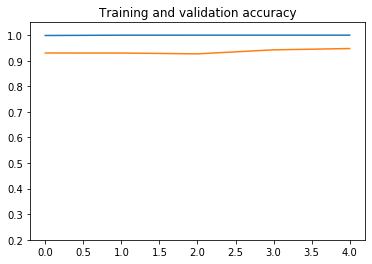

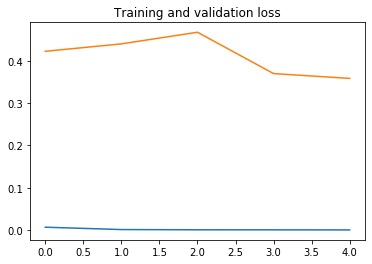

In [26]:
plot_history(history, yrange=(0.2,1.05))

In [68]:
# Loading the saved model
full_model = load_model('newmodel1')

In [27]:
Y_pred = full_model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

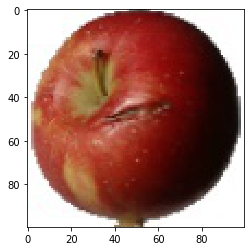

In [28]:
plt.imshow(X_test[25])

In [29]:
y_pred[25]

0

In [32]:
# Converting Confusion matrix to a DataFrame
cm = metrics.confusion_matrix(y_test, y_pred)
df = pd.DataFrame(cm)
print('Confusion Matrix')
df

Confusion Matrix


,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,49,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,48,0,0,0,0
116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,50,0,0,0
117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,37,0,0
118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,46,0


In [6]:
#df.to_csv("Conf_Mat.csv")

In [34]:
print('Classification Report')
print(metrics.classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        49
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        46
           7       1.00      1.00      1.00        50
           8       1.00      1.00      1.00        50
           9       1.00      1.00      1.00        43
          10       1.00      1.00      1.00        49
          11       1.00      1.00      1.00        50
          12       1.00      1.00      1.00        68
          13       1.00      1.00      1.00        50
          14       1.00      1.00      1.00        43
          15       1.00      1.00      1.00        50
          16       1.00      1.00      1.00        49
     

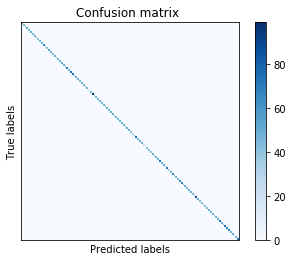

In [36]:
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

In [14]:
from numpy import argmax
label = (test.class_indices)
def which_fruit(pred, label):
    inverted = argmax(pred)
    for key in label:
        if label[key] == inverted:
            return key

In [21]:
image = load_img('D:/Fruits-360/test/Apple Crimson Snow/17_100.jpg', target_size=(256,256))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)

In [22]:
pred = full_model.predict(image)
which_fruit(pred, label)

'Apple Crimson Snow'